# Pricing Options and Option Sensitivities

## I. Pricing a Call & Put Option

The Black-Scholes model can be used to value a non-dividend-paying European-style call or put option.

We can use the Black-Scholes model to price European options for both buyers and sellers, which provides closed-form solutions for pricing call and put options.

- Buyer of a Call Option pays the call price calculated by the Black-Scholes formula. The maximum loss is limited to the premium paid for the option. Potential gains are theoretically unlimited.

- Seller (Writer) of a Call Option receives the premium (call price) as income. Potential losses can be substantial if the stock price rises significantly above the strike price.

- Buyer of a Put Option pays the put price calculated by the Black-Scholes formula. The maximum loss is limited to the premium paid for the option. The maximum gain occurs when the stock price falls to zero.

- Seller (Writer) of a Put Option receives the premium (put price) as income. Potential losses can be substantial if the stock price falls significantly below the strike price.

Buyers have limited risk (premium paid), while sellers face potentially unlimited risk depending on market movements.

In [251]:
import numpy as np
from scipy.stats import norm

def black_scholes_call(S0, K, T, r, sigma):
    """
    Calculate the Black-Scholes price of a European call option.
    
    Parameters:
    - S0: Current stock price
    - K: Strike price
    - T: Time to maturity in years
    - r: Risk-free interest rate (annual)
    - sigma: Volatility of the underlying stock (annual)
    
    Returns:
    - Call option price
    """
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

def black_scholes_put(S0, K, T, r, sigma):
    """
    Calculate the Black-Scholes price of a European put option.
    
    Parameters:
    - S0: Current stock price
    - K: Strike price
    - T: Time to maturity in years
    - r: Risk-free interest rate (annual)
    - sigma: Volatility of the underlying stock (annual)
    
    Returns:
    - Put option price
    """
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    put_price = K * np.exp(-r * T) * norm.cdf(-d2) - S0 * norm.cdf(-d1)
    return put_price

# Example usage:
S0 = 100  # Current stock price
K = 100   # Strike price
T = 1     # Time to maturity in years
r = 0.05  # Risk-free interest rate
sigma = 0.2  # Volatility

call_price = black_scholes_call(S0, K, T, r, sigma)
put_price = black_scholes_put(S0, K, T, r, sigma)

print(f"Call option price: {call_price:.2f}")
print(f"Put option price: {put_price:.2f}")

Call option price: 10.45
Put option price: 5.57


To visualize the profit and loss for both the buyer and seller of a call option, we can use a plot that shows the profit or loss as a function of the underlying stock price at expiration. 

- The profit or loss of Call Option Buyer is calculated as the difference between the stock price and the strike price, minus the premium paid. If the stock price is below the strike price, their loss is the premium paid.

- The profit or loss of Call Option Seller is the premium received minus the difference between the stock price and the strike price if the stock price exceeds the strike price. If the stock price is below the strike price, their profit is the premium received.

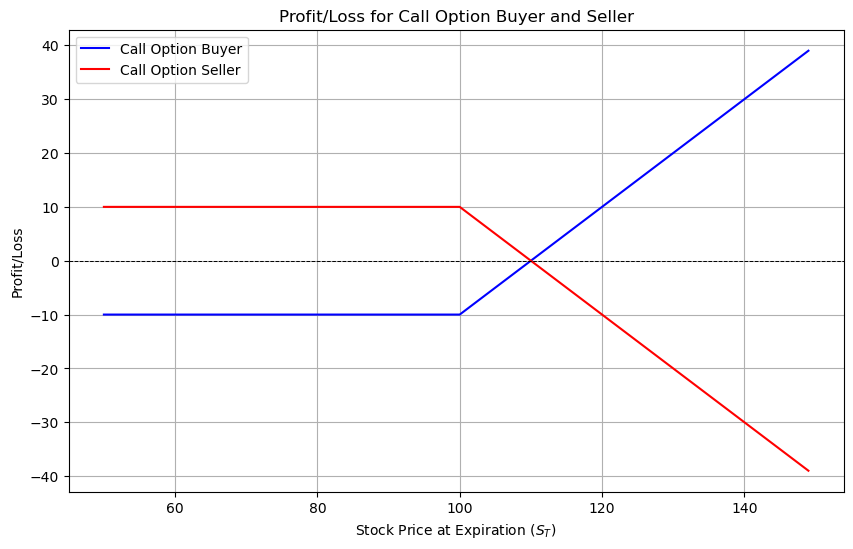

In [252]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
K = 100     # Strike price
C = 10      # Call option premium

# Range of stock prices at expiration
S_T = np.arange(50, 150, 1)

# Calculate payoffs
call_buyer_payoff = np.maximum(S_T - K, 0) - C
call_seller_payoff = C - np.maximum(S_T - K, 0)

# Plotting
plt.figure(figsize=(10, 6))

# Plot for call option buyer
plt.plot(S_T, call_buyer_payoff, label='Call Option Buyer', color='blue')

# Plot for call option seller
plt.plot(S_T, call_seller_payoff, label='Call Option Seller', color='red')

# Add labels and title
plt.axhline(0, color='black', linestyle='--', linewidth=0.7)
plt.xlabel('Stock Price at Expiration ($S_T$)')
plt.ylabel('Profit/Loss')
plt.title('Profit/Loss for Call Option Buyer and Seller')
plt.legend()
plt.grid(True)
plt.show()


- The blue Line represents the Profit/Loss for the call option buyer. The profit increases as the stock price exceeds the strike price minus the premium paid.

- The Red Line represents theProfit/Loss for the call option seller. The profit is the premium received when the stock price is below the strike price, and it decreases as the stock price rises above the strike price.


- The profit of Put Option Buyer increases as the stock price falls below the strike price minus the premium paid. If the stock price is above the strike price, the loss is the premium paid.

- The profit of Put Option Seller is the premium received when the stock price is above the strike price. As the stock price falls below the strike price, their profit decreases due to the intrinsic value of the put option being exercised.

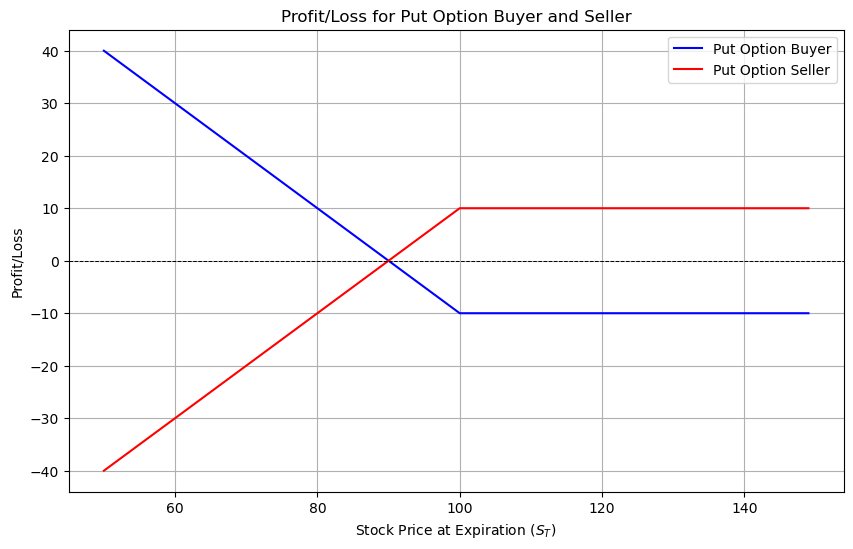

In [253]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
K = 100     # Strike price
P = 10      # Put option premium

# Range of stock prices at expiration
S_T = np.arange(50, 150, 1)

# Calculate payoffs
put_buyer_payoff = np.maximum(K - S_T, 0) - P
put_seller_payoff = P - np.maximum(K - S_T, 0)

# Plotting
plt.figure(figsize=(10, 6))

# Plot for put option buyer
plt.plot(S_T, put_buyer_payoff, label='Put Option Buyer', color='blue')

# Plot for put option seller
plt.plot(S_T, put_seller_payoff, label='Put Option Seller', color='red')

# Add labels and title
plt.axhline(0, color='black', linestyle='--', linewidth=0.7)
plt.xlabel('Stock Price at Expiration ($S_T$)')
plt.ylabel('Profit/Loss')
plt.title('Profit/Loss for Put Option Buyer and Seller')
plt.legend()
plt.grid(True)
plt.show()

- The Blue Line is Profit/Loss for the put option buyer. The profit increases as the stock price decreases below the strike price minus the premium. If the stock price is above the strike price, the loss equals the premium paid.

- The Red Line is Profit/Loss for the put option seller. The profit is the premium received when the stock price is above the strike price. As the stock price falls below the strike price, the loss increases because the put option becomes more valuable.

## II. Put-call parity

Put-call parity is a fundamental principle in options pricing that defines a relationship between the price of a European call option, a European put option, and the underlying asset. This relationship helps ensure that arbitrage opportunities do not exist in the market.

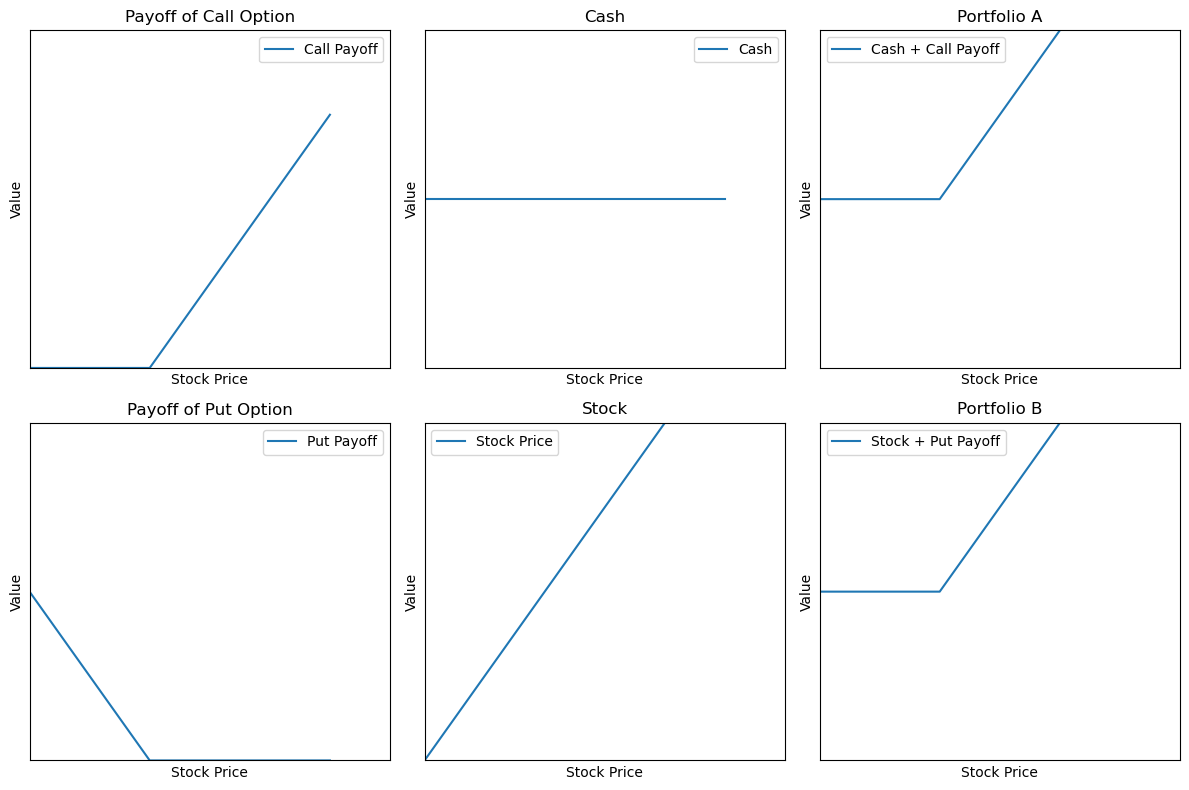

In [257]:
import matplotlib.pyplot as plt
import numpy as np

# Define the parameters
x = 10
sT = np.arange(0, 30, 5)
payoff_call = (np.abs(sT - x) + sT - x) / 2
payoff_put = (np.abs(x - sT) + x - sT) / 2
cash = np.zeros(len(sT)) + x

# Function to set up the plot
def graph(title, text2=''):
    plt.xticks(())
    plt.yticks(())
    plt.xlim(0, 30)
    plt.ylim(0, 20)
    plt.title(title)
    plt.xlabel('Stock Price')
    plt.ylabel('Value')
    plt.grid(True)

# Create subplots
plt.figure(figsize=(12, 8))

# Plot payoff of call option
plt.subplot(2, 3, 1)
graph('Payoff of Call Option')
plt.plot(sT, payoff_call, label='Call Payoff')
plt.legend()

# Plot cash
plt.subplot(2, 3, 2)
graph('Cash', '+')
plt.plot(sT, cash, label='Cash')
plt.legend()

# Plot Portfolio A (Cash + Call Option)
plt.subplot(2, 3, 3)
graph('Portfolio A', '=')
plt.plot(sT, cash + payoff_call, label='Cash + Call Payoff')
plt.legend()

# Plot payoff of put option
plt.subplot(2, 3, 4)
graph('Payoff of Put Option')
plt.plot(sT, payoff_put, label='Put Payoff')
plt.legend()

# Plot Stock
plt.subplot(2, 3, 5)
graph('Stock', '+')
plt.plot(sT, sT, label='Stock Price')
plt.legend()

# Plot Portfolio B (Stock + Put Option)
plt.subplot(2, 3, 6)
graph('Portfolio B', '=')
plt.plot(sT, sT + payoff_put, label='Stock + Put Payoff')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()

## III. The Greeks: Measuring the Sensitivities of Option Value

In [53]:
from py_vollib.black_scholes import black_scholes as bs
from py_vollib.black_scholes.greeks.analytical import delta, gamma, vega, theta, rho

In [54]:
# Implementation of Black-Scholes formula in Python
import numpy as np
from scipy.stats import norm
from py_vollib.black_scholes import black_scholes as bs
from py_vollib.black_scholes.greeks.analytical import delta, gamma, vega, theta, rho
# Define variables 
r = 0.01
S = 30
K = 40
T = 240/365
sigma = 0.30
def blackScholes(r, S, K, T, sigma, type="c"):
    "Calculate BS price of call/put"
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    try:
        if type == "c":
            price = S*norm.cdf(d1, 0, 1) - K*np.exp(-r*T)*norm.cdf(d2, 0, 1)
        elif type == "p":
            price = K*np.exp(-r*T)*norm.cdf(-d2, 0, 1) - S*norm.cdf(-d1, 0, 1)
        return price, bs(type, S, K, T, r, sigma)
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")

In [55]:
print("Option Price: ", blackScholes(r, S, K, T, sigma, "c"))

Option Price:  (0.5132843798399405, 0.5132843798399411)


### 1. Delta

1. Delta Calculation: We need to define the delta Function which calculates the Delta of a call or put option using the Black-Scholes formula. 
- d1 is calculated as per the Black-Scholes formula.
- For a call option, Delta is norm.cdf(d1).
- For a put option, Delta is - norm.cdf(-d1) = norm.cdf(d1) - 1.


In [87]:
import numpy as np
from scipy.stats import norm

def delta_calc(S, K, T, r, sigma, type="c"):
    """
    Calculate the Delta of an option.
   
    """
    d1 = (np.log(S / K) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    
    if type == "c":
        delta_calc = norm.cdf(d1, 0,1) 
    elif type == "p":
        delta_calc = norm.cdf(d1, 0, 1) - 1
    else:
        raise ValueError("Invalid option type. Use 'c' for Call or 'p' for Put.")
    
    return delta_calc

# Example usage
S = 100      # Current stock price
K = 100      # Strike price
T = 0.5      # Time to maturity in years
r = 0.05     # Risk-free rate
sigma = 0.2  # Volatility (standard deviation of stock returns)

call_delta = delta_calc(S, K, T, r, sigma, type="c")
put_delta = delta_calc(S, K, T, r, sigma, type="p")

print(f"Call Delta: {call_delta}")
print(f"Put Delta: {put_delta}")

Call Delta: 0.5977344689084383
Put Delta: -0.4022655310915617


In [89]:
option_type='p'
print("Option Price: ", [round(x,3) for x in blackScholes(r, S, K, T, sigma, option_type)])

Option Price:  [4.42, 4.42]


2. Plotting: We need to plot the Delta by using matplotlib to create two plots—one for call options and one for put options.
- np.linspace is used to create a smooth range of stock prices for plotting.
- plt.plot creates the plots for call and put options, with appropriate labels and titles.

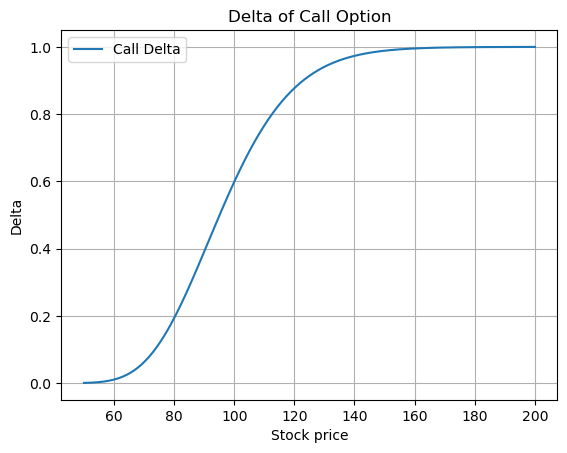

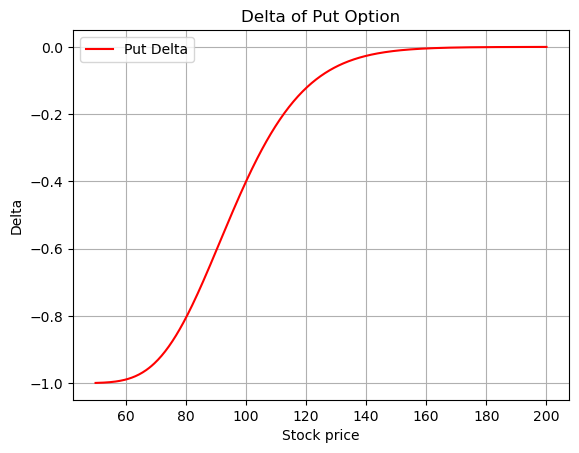

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the Black-Scholes Delta function
def delta(S, T, r, sigma, K, q=0, option="call"):
    d1 = (np.log(S / K) + (r - q + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    if option == "call":
        return norm.cdf(d1)
    elif option == "put":
        return norm.cdf(d1) - 1

# Define the plotting function
def plot_delta_stock(T, r, sigma, K, q=0):
    h1 = lambda S: delta(S, T, r, sigma, K, q, option="call")
    h2 = lambda S: delta(S, T, r, sigma, K, q, option="put")
    
    plt.figure(1)
    interval = np.linspace(K/2, K*2, 500)  # Use linspace for smooth curves
    plt.plot(interval, [h1(x) for x in interval], label="Call Delta")
    plt.xlabel('Stock price')
    plt.ylabel('Delta')
    plt.title('Delta of Call Option')
    plt.grid(True)
    plt.legend()
    plt.show()

    plt.figure(2)
    plt.plot(interval, [h2(x) for x in interval], label="Put Delta", color='red')
    plt.xlabel('Stock price')
    plt.ylabel('Delta')
    plt.title('Delta of Put Option')
    plt.grid(True)
    plt.legend()
    plt.show()

# Example usage
T = 1        # Time to maturity in years
r = 0.05     # Risk-free rate
sigma = 0.2  # Volatility
K = 100      # Strike price
q = 0.02     # Dividend yield

plot_delta_stock(T, r, sigma, K, q)

Plot_delta_time Function: 

The function plot_delta_time is designed to plot the Delta of options (call or put) as a function of time to maturity for different stock prices. 

Depending on whether the option is a "call" or "put", it calculates Delta values for each stock price over a range of times.

- prices: List of stock prices (e.g., out-of-the-money, at-the-money, in-the-money).
- r: Risk-free rate.
- sigma: Volatility.
- K: Strike price.
- q: Dividend yield (default is 0).
- N: Number of time steps to plot (default is 10).
- **opt: Dictionary containing the option type ('call' or 'put').


/var/folders/c4/xntd0yb16dz1d4dv_zrhdtvc0000gn/T/ipykernel_46705/2106440851.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  d1 = (np.log(S / K) + (r - q + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
/var/folders/c4/xntd0yb16dz1d4dv_zrhdtvc0000gn/T/ipykernel_46705/2106440851.py:7: RuntimeWarning: invalid value encountered in double_scalars
  d1 = (np.log(S / K) + (r - q + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))


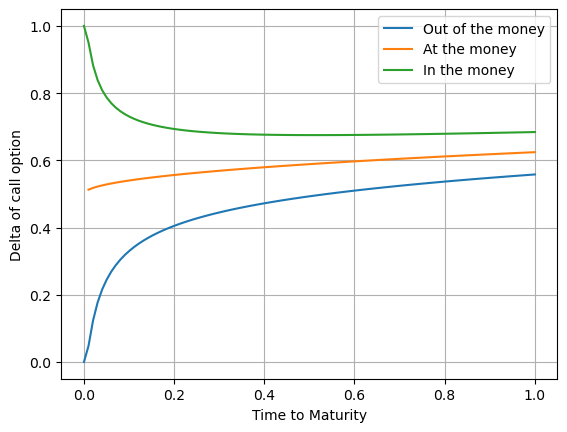

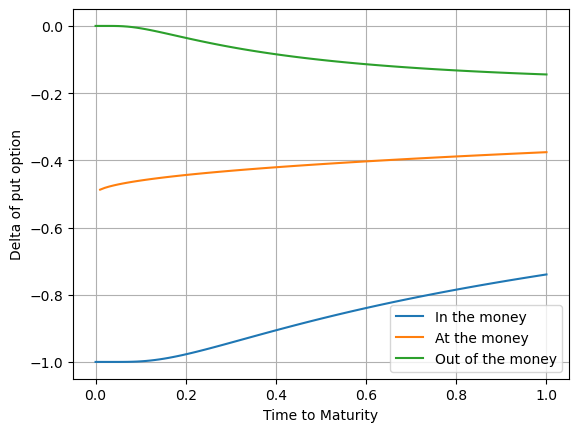

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the Black-Scholes Delta function
def delta(S, T, r, sigma, K, q=0, option="call"):
    d1 = (np.log(S / K) + (r - q + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    if option == "call":
        return norm.cdf(d1)
    elif option == "put":
        return norm.cdf(d1) - 1

# Define the plotting function
def plot_delta_time(prices, r, sigma, K, q=0, N=10, **opt):
    times = np.linspace(0, 1, N, endpoint=True)
    plt.figure()
    
    if opt.get("option") == "call":
        labels = ['Out of the money', 'At the money', 'In the money']
        h = [lambda t, price=price: delta(price, t, r, sigma, K, q, option="call") for price in prices]
    elif opt.get("option") == "put":
        labels = ['In the money', 'At the money', 'Out of the money']
        h = [lambda t, price=price: delta(price, t, r, sigma, K, q, option="put") for price in prices]
    else:
        raise ValueError("Option type must be 'call' or 'put'")

    for func, label in zip(h, labels):
        plt.plot(times, [func(t) for t in times], label=label)
    
    plt.xlabel('Time to Maturity')
    plt.ylabel(f'Delta of {opt.get("option")} option')
    plt.grid(True)
    plt.legend()
    plt.show()

# Example usage
plot_delta_time([95, 100, 105], 0.05, 0.3, 100, 0, N=100, option="call")
plot_delta_time([75, 100, 125], 0.05, 0.3, 100, N=100, option="put")

## 2. Gamma

Gamma measures the rate of change of Delta with respect to changes in the stock price, providing insights into the curvature of the option’s price with respect to the underlying asset price.


In [100]:
import numpy as np
import scipy.stats as scp

def gamma(S0, T, r, sigma, K, q=0):
    """
    Calculate the Gamma of an option using the Black-Scholes model.    
    """
    
    d1 = (np.log(S0 / K) + (r - q + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    gamma_value = np.exp(-q * T) * scp.norm.pdf(d1) / (S0 * sigma * np.sqrt(T))
    return gamma_value

# Example usage
S0 = 100      # Current stock price
K = 100       # Strike price
T = 0.5       # Time to maturity in years
r = 0.05      # Risk-free rate
sigma = 0.2   # Volatility (standard deviation of stock returns)
q = 0         # Dividend yield (default is 0)

gamma_value = gamma(S0, T, r, sigma, K, q)
print(f"Gamma: {gamma_value}")

Gamma: 0.027358658565220986


The plot_gamma_stock function aims to plot the Gamma of an option as a function of the stock price, using various input parameters. 

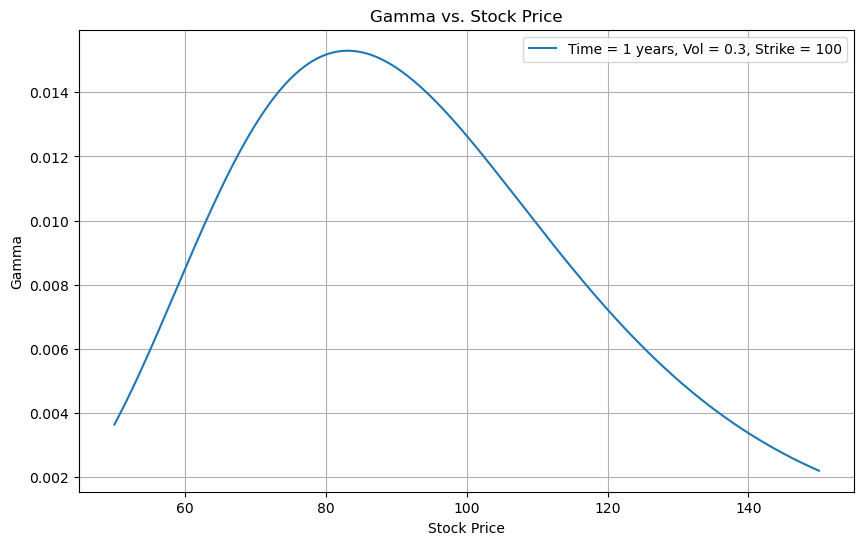

In [98]:
# Define the plot function
def plot_gamma_stock(T, r, sigma, K, q=0):
    """
    Plot the Gamma of an option as a function of the stock price.
    
    """
    h = lambda S: gamma(S, T, r, sigma, K, q)
    plt.figure(figsize=(10, 6))
    interval = np.linspace(K / 2, 3 * K / 2, 500)  # Use linspace for smooth curves
    plt.plot(interval, [h(x) for x in interval],
             label='Time = {0} years, Vol = {1}, Strike = {2}'.format(T, sigma, K))
    plt.xlabel('Stock Price')
    plt.ylabel('Gamma')
    plt.title('Gamma vs. Stock Price')
    plt.grid(True)
    plt.legend()
    plt.show()

# Example usage
plot_gamma_stock(1, 0.05, 0.3, 100)

The plot_gamma_time([90,100,110],0.05,0.3,100,0,100) will produce a plot showing how Gamma varies with time to maturity for stock prices of 90, 100, and 110.

/var/folders/c4/xntd0yb16dz1d4dv_zrhdtvc0000gn/T/ipykernel_46705/1793314822.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  d1 = (np.log(S0 / K) + (r - q + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
/var/folders/c4/xntd0yb16dz1d4dv_zrhdtvc0000gn/T/ipykernel_46705/1793314822.py:10: RuntimeWarning: invalid value encountered in double_scalars
  gamma_value = np.exp(-q * T) * scp.norm.pdf(d1) / (S0 * sigma * np.sqrt(T))
/var/folders/c4/xntd0yb16dz1d4dv_zrhdtvc0000gn/T/ipykernel_46705/1793314822.py:9: RuntimeWarning: invalid value encountered in double_scalars
  d1 = (np.log(S0 / K) + (r - q + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))


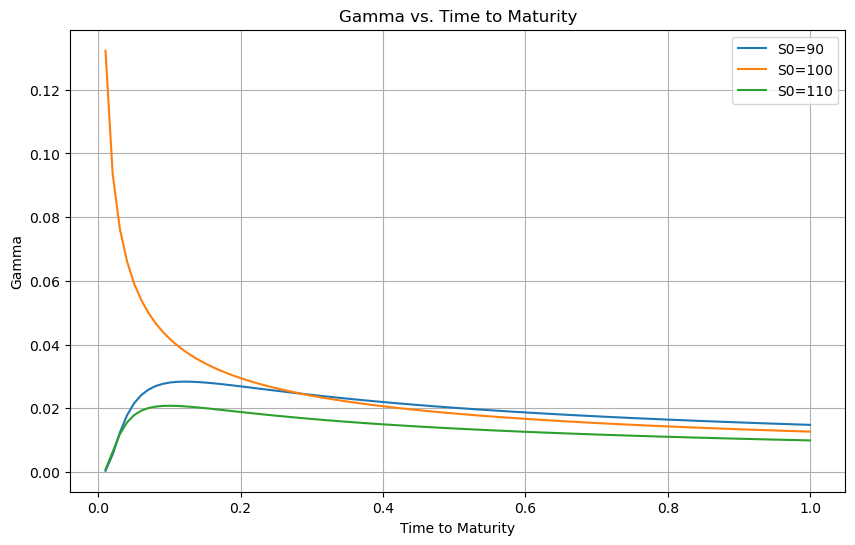

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def plot_gamma_time(prices, r, sigma, K, q=0, N=10):
    """
    Plot the Gamma of an option as a function of time to maturity for different stock prices.
    
    Parameters:
    prices : List of stock prices (e.g., [Out of the money, At the money, In the money])
    r : Risk-free interest rate
    sigma : Volatility (standard deviation of stock returns)
    K : Strike price
    q : Dividend yield (default is 0)
    N : Number of time steps to plot (default is 10)
    """
    times = np.linspace(0, 1, N, endpoint=True)
    
    h = [lambda t, S=price: gamma(S, t, r, sigma, K, q) for price in prices]
    
    plt.figure(figsize=(10, 6))
    
    for i, func in enumerate(h):
        plt.plot(times, [func(t) for t in times], label=f'S0={prices[i]}')
    
    plt.xlabel('Time to Maturity')
    plt.ylabel('Gamma')
    plt.title('Gamma vs. Time to Maturity')
    plt.grid(True)
    plt.legend()
    plt.show()

# Example usage
plot_gamma_time([90, 100, 110], 0.05, 0.3, 100, q=0, N=100)

## 3. Vega

The vega_calc function calculates the Vega of an option, which measures the sensitivity of the option's price to changes in the volatility of the underlying asset. Vega is an important metric in options trading as it helps understand how changes in volatility affect the option's price.


In [102]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def vega_calc(S, K, T, r, sigma):
    """
    Calculate the Vega of an option using the Black-Scholes model.
    
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    vega_value = S * norm.pdf(d1) * np.sqrt(T)
    return vega_value * 0.01

# Example usage
S = 100      # Current stock price
K = 100      # Strike price
T = 0.5      # Time to maturity in years
r = 0.05     # Risk-free rate
sigma = 0.2  # Volatility

vega_value = vega_calc(S, K, T, r, sigma)
print(f"Vega: {vega_value}")

Vega: 0.2735865856522099


To create a plot_vega_stock function, which plots the Vega of call and put options as a function of the stock price, follow these steps:
- Calculate Vega: Vega measures the sensitivity of the option price to changes in the volatility of the underlying asset. For Vega calculation, we'll use the Black-Scholes formula.
- Plot Vega: Create plots for Vega as a function of stock price for both call and put options.

/Users/zakariyaboutayeb/anaconda3/lib/python3.10/site-packages/py_vollib/ref_python/black_scholes/__init__.py:87: RuntimeWarning: divide by zero encountered in double_scalars
  return numerator / denominator


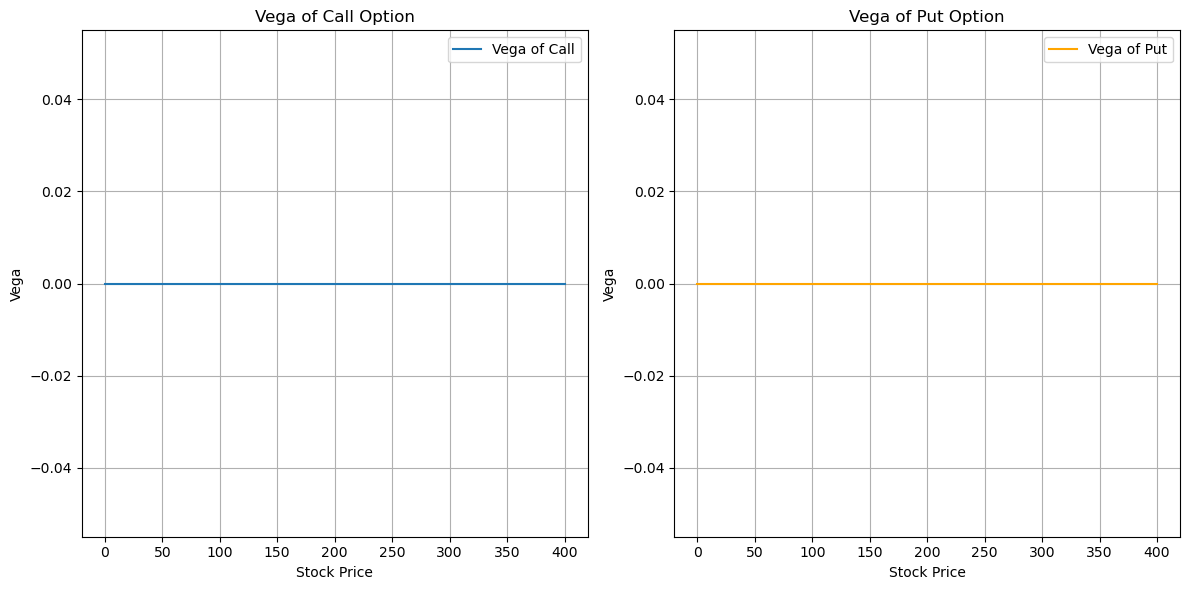

In [114]:
def plot_vega_stock(T, r, sigma, K, q=0):
    """
    Plot the Vega of call and put options as a function of stock price.
    
    """
    h1 = lambda S: vega(S, T, r, sigma, K, q)  # Vega for call options
    h2 = lambda S: vega(S, T, r, sigma, K, q)  # Vega is the same for call and put
    
    plt.figure(figsize=(12, 6))
    
    # Define the range for stock prices
    interval = np.linspace(0, K * 4, 500)  # Use linspace for smoother curves
    
    # Plot Vega for call options
    plt.subplot(1, 2, 1)
    plt.plot(interval, [h1(x) for x in interval], label='Vega of Call')
    plt.xlabel('Stock Price')
    plt.ylabel('Vega')
    plt.title('Vega of Call Option')
    plt.grid(True)
    plt.legend()
    
    # Plot Vega for put options
    plt.subplot(1, 2, 2)
    plt.plot(interval, [h2(x) for x in interval], label='Vega of Put', color='orange')
    plt.xlabel('Stock Price')
    plt.ylabel('Vega')
    plt.title('Vega of Put Option')
    plt.grid(True)
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Example usage
plot_vega_stock(1, 0.05, 0.4, 100)
    

## 4. Theta



In [111]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def theta(S0, T, r, sigma, K, q=0, option="call"):
    """
    Calculate the Theta of an option using the Black-Scholes model.
    
    """
    d1 = (np.log(S0 / K) + (r - q + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option == "call":
        theta_value = - (S0 * norm.pdf(d1) * sigma * np.exp(-q * T) / (2 * np.sqrt(T)) +
                         r * K * np.exp(-r * T) * norm.cdf(d2) -
                         q * S0 * np.exp(-q * T) * norm.cdf(d1))
    elif option == "put":
        theta_value = - (S0 * norm.pdf(d1) * sigma * np.exp(-q * T) / (2 * np.sqrt(T)) -
                         r * K * np.exp(-r * T) * norm.cdf(-d2) +
                         q * S0 * np.exp(-q * T) * norm.cdf(-d1))
    else:
        raise ValueError("Option type must be 'call' or 'put'")
    
    return theta_value

The plot_theta_stock function is designed to plot the Theta of call and put options as a function of the stock price. Theta measures the sensitivity of the option's price to changes in time to maturity, representing the rate at which the option's price decreases as time passes.

plt.subplot is used to create side-by-side plots for call and put options.


/var/folders/c4/xntd0yb16dz1d4dv_zrhdtvc0000gn/T/ipykernel_46705/2781293799.py:10: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(S0 / K) + (r - q + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))


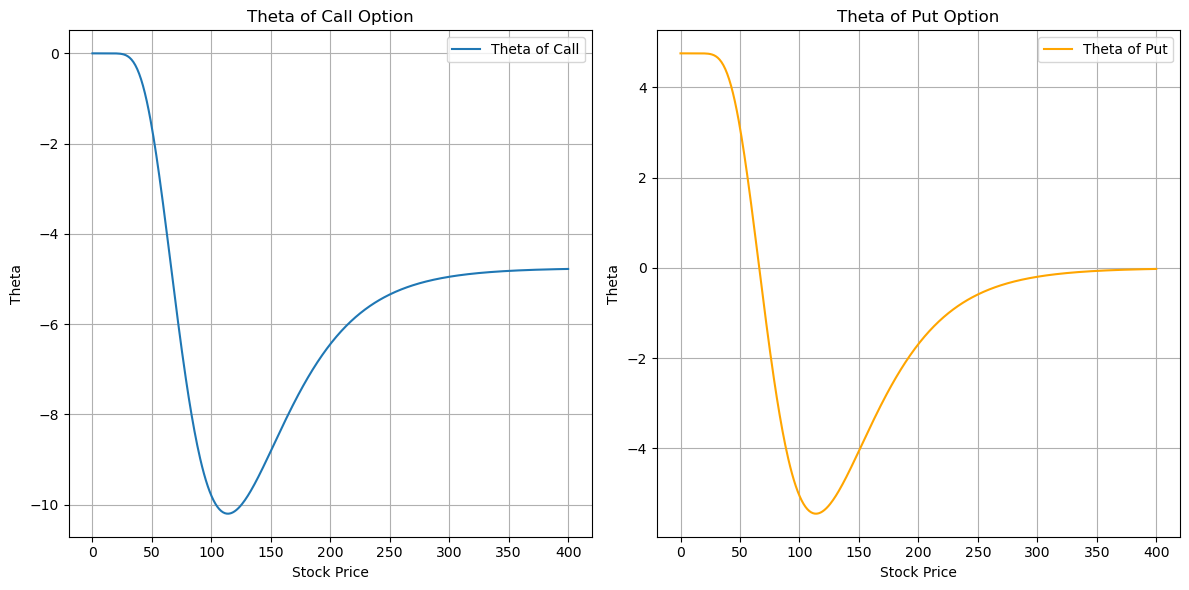

In [113]:
def plot_theta_stock(T, r, sigma, K, q=0):
    """
    Plot the Theta of call and put options as a function of stock price.
    
    """
    h1 = lambda S: theta(S, T, r, sigma, K, q, option="call")
    h2 = lambda S: theta(S, T, r, sigma, K, q, option="put")
    
    plt.figure(figsize=(12, 6))
    
    # Define the range for stock prices
    interval = np.linspace(0, K * 4, 500)  # Use linspace for smoother curves
    
    # Plot Theta for call options
    plt.subplot(1, 2, 1)
    plt.plot(interval, [h1(x) for x in interval], label='Theta of Call')
    plt.xlabel('Stock Price')
    plt.ylabel('Theta')
    plt.title('Theta of Call Option')
    plt.grid(True)
    plt.legend()
    
    # Plot Theta for put options
    plt.subplot(1, 2, 2)
    plt.plot(interval, [h2(x) for x in interval], label='Theta of Put', color='orange')
    plt.xlabel('Stock Price')
    plt.ylabel('Theta')
    plt.title('Theta of Put Option')
    plt.grid(True)
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Example usage
plot_theta_stock(1, 0.05, 0.4, 100)

## 5. Rho

The rho_calc function calculates the Rho of an option using the Black-Scholes model. Rho measures the sensitivity of the option's price to changes in the risk-free interest rate. It is an important Greeks metric in options trading.


In [119]:
import numpy as np
from scipy.stats import norm

def rho_calc(S, K, T, r, sigma, option="c"):
    """
    Calculate the Rho of an option using the Black-Scholes model.
    
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option == "c":
        rho_value = K * T * np.exp(-r * T) * norm.cdf(d2)
    elif option == "p":
        rho_value = -K * T * np.exp(-r * T) * norm.cdf(-d2)
    else:
        raise ValueError("Option type must be 'c' for Call or 'p' for Put")
    
    return rho_value * 0.01 # Convert to per 1% change

# Example usage
S = 100      # Current stock price
K = 100      # Strike price
T = 0.5      # Time to maturity in years
r = 0.05     # Risk-free rate
sigma = 0.2  # Volatility

rho_call = rho_calc(S, K, T, r, sigma, option="c")
rho_put = rho_calc(S, K, T, r, sigma, option="p")

print(f"Rho of Call: {rho_call}")
print(f"Rho of Put: {rho_put}")

Rho of Call: 0.264423591565816
Rho of Put: -0.2232313644483503


/var/folders/c4/xntd0yb16dz1d4dv_zrhdtvc0000gn/T/ipykernel_46705/940455169.py:9: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))


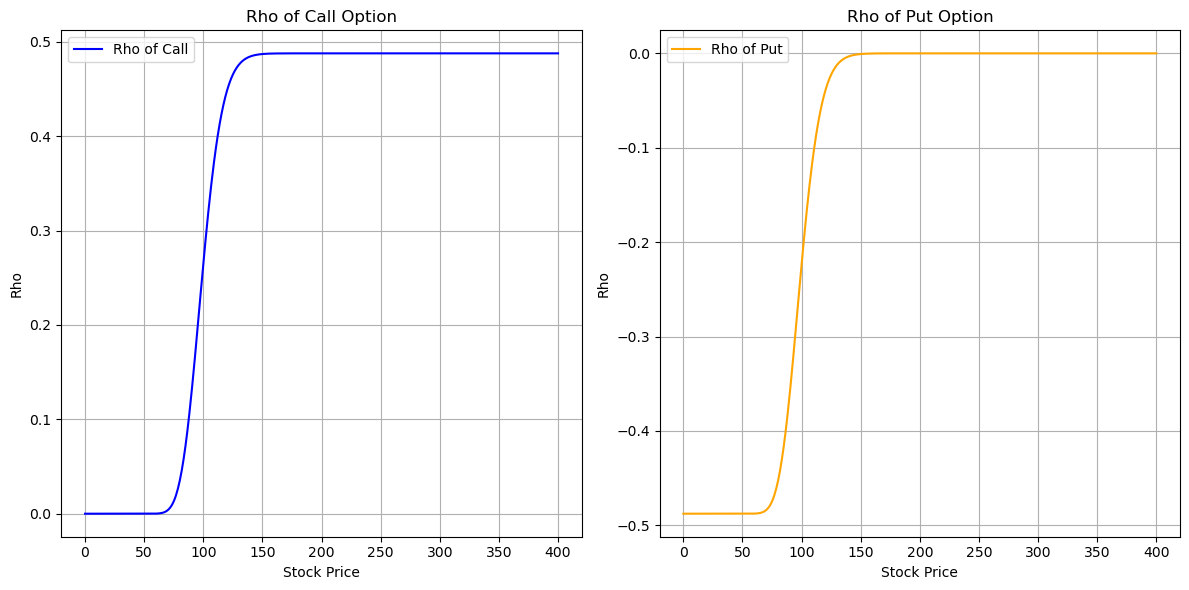

In [121]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def plot_rho_stock(T, r, sigma, K, q=0):
    """
    Plot the Rho of call and put options as a function of stock price.
    
    """
    h1 = lambda S: rho_calc(S, K, T, r, sigma, option="c")
    h2 = lambda S: rho_calc(S, K, T, r, sigma, option="p")
    
    plt.figure(figsize=(12, 6))
    
    # Define the range for stock prices
    interval = np.linspace(0, K * 4, 500)  # Smooth curve
    
    # Plot Rho for call options
    plt.subplot(1, 2, 1)
    plt.plot(interval, [h1(x) for x in interval], label='Rho of Call', color='blue')
    plt.xlabel('Stock Price')
    plt.ylabel('Rho')
    plt.title('Rho of Call Option')
    plt.grid(True)
    plt.legend()
    
    # Plot Rho for put options
    plt.subplot(1, 2, 2)
    plt.plot(interval, [h2(x) for x in interval], label='Rho of Put', color='orange')
    plt.xlabel('Stock Price')
    plt.ylabel('Rho')
    plt.title('Rho of Put Option')
    plt.grid(True)
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Example usage
plot_rho_stock(T=0.5, r=0.05, sigma=0.2, K=100)